In [3]:
import numpy as np
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def generate_latex_color(name):
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    
    inp = [name, "RGB"]

    l = "\\definecolor{"
    l += f"{inp[0]}"
    l += "}{"
    l += f"{inp[1]}"
    l += "}{"
    l += f"{r}, {g}, {b}"
    l += "}"

    # print(l)
    
    return l


for i in range(100):
    print(generate_latex_color(f"color{i}"))
    

\definecolor{color0}{RGB}{53, 198, 133}
\definecolor{color1}{RGB}{78, 188, 151}
\definecolor{color2}{RGB}{33, 28, 145}
\definecolor{color3}{RGB}{140, 123, 0}
\definecolor{color4}{RGB}{96, 68, 61}
\definecolor{color5}{RGB}{208, 136, 72}
\definecolor{color6}{RGB}{42, 117, 43}
\definecolor{color7}{RGB}{247, 106, 224}
\definecolor{color8}{RGB}{27, 24, 56}
\definecolor{color9}{RGB}{67, 81, 184}
\definecolor{color10}{RGB}{163, 19, 134}
\definecolor{color11}{RGB}{152, 102, 154}
\definecolor{color12}{RGB}{103, 101, 141}
\definecolor{color13}{RGB}{47, 22, 4}
\definecolor{color14}{RGB}{33, 206, 164}
\definecolor{color15}{RGB}{20, 248, 193}
\definecolor{color16}{RGB}{220, 212, 187}
\definecolor{color17}{RGB}{183, 180, 151}
\definecolor{color18}{RGB}{183, 128, 222}
\definecolor{color19}{RGB}{196, 185, 203}
\definecolor{color20}{RGB}{179, 135, 157}
\definecolor{color21}{RGB}{42, 237, 157}
\definecolor{color22}{RGB}{95, 84, 7}
\definecolor{color23}{RGB}{22, 112, 1}
\definecolor{color24}{RGB}{198, 11

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:25<00:00,  2.32s/it]

Success rate: 0.8


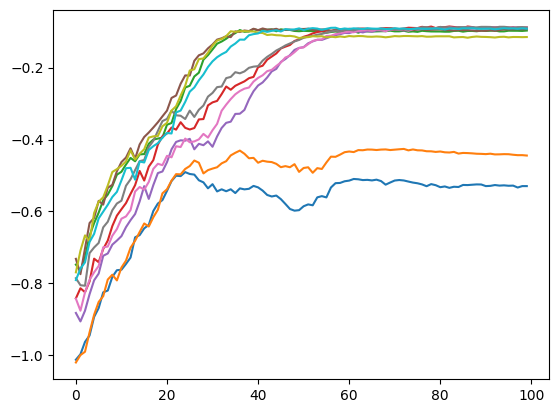

In [4]:
import os
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.env_util import make_vec_env

env = gym.make("Pusher-v4", render_mode='human', max_episode_steps=100)
vec_env = make_vec_env(lambda:env, n_envs=1)

path = os.getcwd()
savepath = os.path.join(path, os.pardir)

model = PPO.load(f"{savepath}/models/ppo_5M_200step_lr")
#model = PPO.load("logs/best_model")
#model = SAC.load(f"{savepath}/models/sac_10M_200ep")

N_SEEDS = 10
seeds = [0]
seeds += [i for i in range(N_SEEDS)]
succ_rate = 0

rewards_lst=[]
for seed in tqdm(seeds):
    vec_env.seed(seed)
    state = vec_env.reset()
    rewards_i = []
    while True:
        action, _states = model.predict(state)
        state, rewards, dones, info = vec_env.step(action)
        #print(rewards)
        #vec_env.render("human")
        rewards_i.append(rewards[0])
        


        if dones:
            break
    rewards_lst.append(rewards_i)
    if rewards_i[-1]>=-0.12:
        succ_rate += 1

vec_env.close()

print(f"Success rate: {succ_rate/N_SEEDS}")

r_t = []
latex_full = """"""
style = "thick"
coloridx = np.random.choice(range(N_SEEDS), N_SEEDS, replace=False)
for (y,s, cid) in zip(rewards_lst, seeds, coloridx):

    cid = int(cid)
    # y = moving_average(y, n=20)
    x = [i for i in range(len(y))]
    r_t.append(y[-1])
    plt.plot(x,y)

    latex = ""

    for x_i, y_i in zip(x, y):
        latex += f"({x_i}, {y_i})"

    color = f"color{cid}"
    latex_full += f"""\\addplot[
                    color={color},
                    style={style}
                    ]
                    coordinates
                """

    latex_full += " "
    latex_full += "{"
    latex_full += latex
    latex_full += "};"
    latex_full += "\n"

In [15]:
print(latex_full)

\addplot[
                    color=color26,
                    style=thick
                    ]
                    coordinates
                 {(0, -0.9007400274276733)(1, -0.9565490484237671)(2, -0.8673593997955322)(3, -0.9261457324028015)(4, -0.8888342380523682)(5, -0.8607105612754822)(6, -0.8667089343070984)(7, -0.7818190455436707)(8, -0.7884753346443176)(9, -0.7568320631980896)(10, -0.7252476811408997)(11, -0.7548227906227112)(12, -0.6131007671356201)(13, -0.6384698748588562)(14, -0.598275899887085)(15, -0.5597402453422546)(16, -0.567831814289093)(17, -0.5513700246810913)(18, -0.5108113288879395)(19, -0.5105669498443604)(20, -0.5138152837753296)(21, -0.5604062676429749)(22, -0.48367276787757874)(23, -0.46694496273994446)(24, -0.5470052361488342)(25, -0.49129971861839294)(26, -0.47353777289390564)(27, -0.46764764189720154)(28, -0.46416857838630676)(29, -0.44729599356651306)(30, -0.42177921533584595)(31, -0.47926613688468933)(32, -0.43597090244293213)(33, -0.395675390958786)(34,

: 